In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Number of sampling

In [2]:
N = 500000

# Sampling for ACT simulation

$R_1$ in range $[15,600]\ {\rm \Omega}$

$R_2$ in range $[5,250]\ {\rm \Omega}$

$T_{1,W}$ in range $[30,200]\ {\rm \mu m}$

$T_{1,L}$ in range $[20,120]\ {\rm \mu m}$

$T_{2,W}$ in range $[200,800]\ {\rm \mu m}$

$T_{2,L}$ in range $[10,70]\ {\rm \mu m}$

**Constraits:**

$R_1 - R_2 > 0$

$T_{1,W} - T_{1,L} > 0$

$T_{2,W} - T_{2,L} > 0$

In [3]:
# Brojo, you can change the range here for the components in ACT circuits
range_r1  = [15, 600]
range_r2  = [5, 250]
range_t11 = [30, 200]
range_t12 = [20, 120]
range_t21 = [200, 800]
range_t22 = [10, 70]

In [4]:
RANGE = torch.tensor([range_r1, range_r2, range_t11, range_t12, range_t21, range_t22])

In [5]:
ACT_sampling_mc =  torch.quasirandom.SobolEngine(6).draw(N)
ACT_sampling_mc = ACT_sampling_mc*(RANGE[:,1]-RANGE[:,0]) + RANGE[:,0]
ACT_sampling_mc = np.round(ACT_sampling_mc)

In [6]:
r1 = ACT_sampling_mc[:,0]
r2 = ACT_sampling_mc[:,1]
W1 = ACT_sampling_mc[:,2]
L1 = ACT_sampling_mc[:,3]
W2 = ACT_sampling_mc[:,4]
L2 = ACT_sampling_mc[:,5]

# Remove unsuitable values

$\frac {a - b}{|a-b|} = {\rm sign} {\left( a-b \right)} \in \{-1,1, nan\}$, where `nan` appears when $a = b$.

Then we use ReLU function:

In case $a>b$: ${\rm sign} {\left( a-b \right)}=1$, we keep this value;

In case $a<b$: ${\rm sign} {\left( a-b \right)}=-1$, ReLu transform the value to $0$;

In case $a=b$: we transform `nan` manuelly to $0$.

In [7]:
MASK1 = torch.nn.functional.relu((r1 - r2) / (r1 - r2).abs()).view(-1,1)
MASK2 = torch.nn.functional.relu((W1 - L1) / (W1 - L1).abs()).view(-1,1)
MASK3 = torch.nn.functional.relu((W2 - L2) / (W2 - L2).abs()).view(-1,1)
MASK1 = torch.nan_to_num(MASK1)
MASK2 = torch.nan_to_num(MASK2)
MASK3 = torch.nan_to_num(MASK3)

After calculate the mask, we multiply mask to the sampling, and then, the unsuitable rows become 0. Then, we remove the 0-valued rows.

In [8]:
ACT_sampling_mc = ACT_sampling_mc * MASK1 * MASK2 * MASK3
ACT_sampling_mc

tensor([[ 15.,   5.,  30.,  20., 200.,  10.],
        [308., 128., 115.,  70., 500.,  40.],
        [454.,  66.,  72.,  45., 650.,  55.],
        ...,
        [476., 244., 144.,  48., 314.,  59.],
        [329.,  60., 102.,  73., 464.,  44.],
        [  0.,   0.,   0.,   0.,   0.,   0.]])

In [9]:
ACT_sampling_mc = ACT_sampling_mc[ACT_sampling_mc.sum(dim=1) != 0.]
print(ACT_sampling_mc)
ACT_sampling_mc.shape

tensor([[ 15.,   5.,  30.,  20., 200.,  10.],
        [308., 128., 115.,  70., 500.,  40.],
        [454.,  66.,  72.,  45., 650.,  55.],
        ...,
        [549.,  91., 165.,  60., 239.,  52.],
        [476., 244., 144.,  48., 314.,  59.],
        [329.,  60., 102.,  73., 464.,  44.]])


torch.Size([306103, 6])

In [10]:
# check the real range of sampling
torch.stack([torch.min(ACT_sampling_mc, dim=0)[0], torch.max(ACT_sampling_mc, dim=0)[0]])

tensor([[ 15.,   5.,  30.,  20., 200.,  10.],
        [600., 250., 200., 120., 800.,  70.]])

In [11]:
ACT_sampling_mc = ACT_sampling_mc[:100000,:]

In [12]:
np.savetxt('ACT_MC_FULL.csv', ACT_sampling_mc, fmt='%d', delimiter=',')
ACT_sampling_mc.shape

torch.Size([100000, 6])

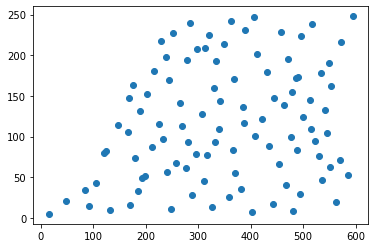

In [13]:
plt.scatter(ACT_sampling_mc[:100,0],ACT_sampling_mc[:100,1])

# Sampling for INV

$R_1$ in range $[10,500]\ {\rm \Omega}$

$R_2$ in range $[5,250]\ {\rm \Omega}$

$R_3$ in range $[10500]\ {\rm k \Omega}$

$R_4$ in range $[8,400]\ {\rm k \Omega}$

$R_5$ in range $[10500]\ {\rm k \Omega}$

$T_{1,W}$ in range $[200,800]\ {\rm \mu m}$

$T_{1,L}$ in range $[10,70]\ {\rm \mu m}$

**Constraits:**

$R_1 - R_2 > 0$

$R_3 - R_4 > 0$

$\frac{R_1}{R_2} - \frac{R_3}{R_4} > 0$

$T_{1,W} - T_{1,L} > 0$

In [14]:
# Brojo, you can change the range here for the components in INV circuits
range_r1  = [10,  500]
range_r2  = [5,   250]
range_r3  = [10,  500]
range_r4  = [8,   400]
range_r5  = [10,  500]
range_t11 = [200, 800]
range_t12 = [10,  70]

In [15]:
RANGE = torch.tensor([range_r1, range_r2, range_r3, range_r4, range_r5, range_t11, range_t12])

In [16]:
INV_sampling_mc = torch.quasirandom.SobolEngine(7).draw(N)
INV_sampling_mc = INV_sampling_mc*(RANGE[:,1]-RANGE[:,0]) + RANGE[:,0]
INV_sampling_mc = np.round(INV_sampling_mc)

# Remove unsuitable sampling

In [17]:
r1 = INV_sampling_mc[:,0]
r2 = INV_sampling_mc[:,1]
r3 = INV_sampling_mc[:,2]
r4 = INV_sampling_mc[:,3]
W = INV_sampling_mc[:,5]
L = INV_sampling_mc[:,6]

In [18]:
MASK1 = torch.nn.functional.relu((r1 - r2) / (r1 - r2).abs()).view(-1,1)
MASK2 = torch.nn.functional.relu((r3 - r4) / (r3 - r4).abs()).view(-1,1)
MASK3 = torch.nn.functional.relu((r1/r2 - r3/r4) / (r1/r2 - r3/r4).abs()).view(-1,1)
MASK4 = torch.nn.functional.relu((W - L) / (W - L).abs()).view(-1,1)
MASK1 = torch.nan_to_num(MASK1)
MASK2 = torch.nan_to_num(MASK2)
MASK3 = torch.nan_to_num(MASK3)
MASK4 = torch.nan_to_num(MASK4)

In [19]:
INV_sampling_mc = INV_sampling_mc * MASK1 * MASK2 * MASK3 * MASK4
INV_sampling_mc

tensor([[ 10.,   5.,  10.,  ...,  10., 200.,  10.],
        [255., 128., 255.,  ..., 255., 500.,  40.],
        [378.,  66., 132.,  ..., 378., 650.,  25.],
        ...,
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [273.,  60., 217.,  ..., 226., 544.,  11.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.]])

In [20]:
INV_sampling_mc = INV_sampling_mc[INV_sampling_mc.sum(dim=1) != 0.]
print(INV_sampling_mc)
INV_sampling_mc.shape

tensor([[ 10.,   5.,  10.,  ...,  10., 200.,  10.],
        [255., 128., 255.,  ..., 255., 500.,  40.],
        [378.,  66., 132.,  ..., 378., 650.,  25.],
        ...,
        [488., 167., 186.,  ..., 318., 506.,  52.],
        [457.,  91., 400.,  ...,  42., 619.,  34.],
        [273.,  60., 217.,  ..., 226., 544.,  11.]])


torch.Size([136153, 7])

In [21]:
# check the real range of sampling
torch.stack([torch.min(INV_sampling_mc, dim=0)[0], torch.max(INV_sampling_mc, dim=0)[0]])

tensor([[ 10.,   5.,  10.,   8.,  10., 200.,  10.],
        [500., 250., 500., 400., 500., 800.,  70.]])

In [22]:
INV_sampling_mc = INV_sampling_mc[:100000,:]

In [23]:
np.savetxt('INV_MC_FULL.csv', INV_sampling_mc, fmt='%d', delimiter=',')
INV_sampling_mc.shape

torch.Size([100000, 7])